In [11]:
import pandas as pd

df = pd.read_excel('credit_card.xls', header=1, sheet_name='Data').iloc[0:, 1:]

In [12]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
df.shape

(30000, 24)

In [16]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [18]:
df.rename(columns={'PAY_2':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

<AxesSubplot:>

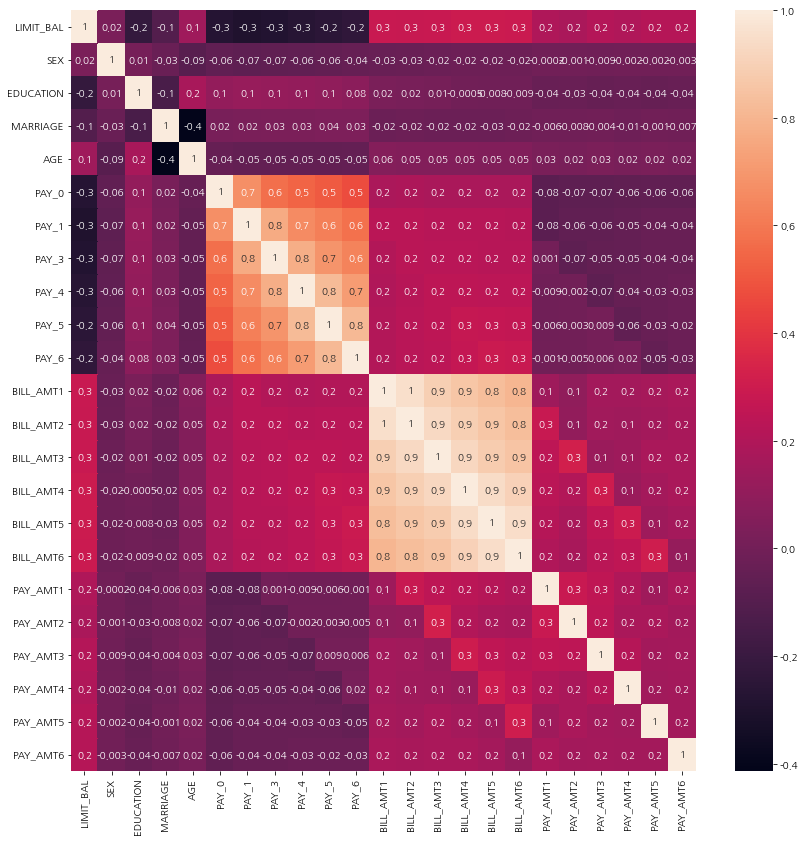

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [25]:
# BILL_AMT 1 ~ BILL_AMT6까지 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# 2개의 PCA 속성을 가진 PCA 객체 생성하고 explained_variance_rato_ 계산 위해 fit 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

PCA Component별 변동성: [0.90555253 0.0509867 ]


In [27]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores_pca = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 개별 Fold 세트별 정확도:', scores)
print('평균 정확도:{:.4f}'.format(np.mean(scores)))

CV=3인 경우의 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [28]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{:.4f}'.format(np.mean(scores_pca)))


CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7908 0.7987 0.8039]
PCA 변환 데이터 세트 평균 정확도:0.7978
